In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [3]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [ ]:
#Group A and Group B (27.10.2025 12:30 - 14:00)

In [4]:
driver = Chrome()

In [5]:
driver.get("https://books.toscrape.com/")

In [6]:
categories = driver.find_elements(By.CSS_SELECTOR, "div.side_categories ul li ul li a")
category_links = {}
for cat in categories:
    name = cat.text.strip()
    href = cat.get_attribute("href")
    category_links[name] = href
    
print(category_links)

{'Travel': 'https://books.toscrape.com/catalogue/category/books/travel_2/index.html', 'Mystery': 'https://books.toscrape.com/catalogue/category/books/mystery_3/index.html', 'Historical Fiction': 'https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html', 'Sequential Art': 'https://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html', 'Classics': 'https://books.toscrape.com/catalogue/category/books/classics_6/index.html', 'Philosophy': 'https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html', 'Romance': 'https://books.toscrape.com/catalogue/category/books/romance_8/index.html', 'Womens Fiction': 'https://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html', 'Fiction': 'https://books.toscrape.com/catalogue/category/books/fiction_10/index.html', 'Childrens': 'https://books.toscrape.com/catalogue/category/books/childrens_11/index.html', 'Religion': 'https://books.toscrape.com/catalogue/category/books/re

In [7]:
books_per_category = {}

for cat_name, cat_url in category_links.items():
    driver.get(cat_url)
    count = 0

    while True:
        books = driver.find_elements(By.CSS_SELECTOR, "article.product_pod")
        count += len(books)

        try:
            next_button = driver.find_element(By.CSS_SELECTOR, "li.next a")
            next_page_url = next_button.get_attribute("href")
            driver.get(next_page_url)
        except:
            break  

    books_per_category[cat_name] = count
    print(f"{cat_name}: {count} ")


Travel: 11 
Mystery: 32 
Historical Fiction: 26 
Sequential Art: 75 
Classics: 19 
Philosophy: 11 
Romance: 35 
Womens Fiction: 17 
Fiction: 65 
Childrens: 29 
Religion: 7 
Nonfiction: 110 
Music: 13 
Default: 152 
Science Fiction: 16 
Sports and Games: 5 
Add a comment: 67 
Fantasy: 48 
New Adult: 6 
Young Adult: 54 
Science: 14 
Poetry: 19 
Paranormal: 1 
Art: 8 
Psychology: 7 
Autobiography: 9 
Parenting: 1 
Adult Fiction: 1 
Humor: 10 
Horror: 17 
History: 18 
Food and Drink: 30 
Christian Fiction: 6 
Business: 12 
Biography: 5 
Thriller: 11 
Contemporary: 3 
Spirituality: 6 
Academic: 1 
Self Help: 5 
Historical: 2 
Christian: 3 
Suspense: 1 
Short Stories: 1 
Novels: 1 
Health: 4 
Politics: 3 
Cultural: 1 
Erotica: 1 
Crime: 1 


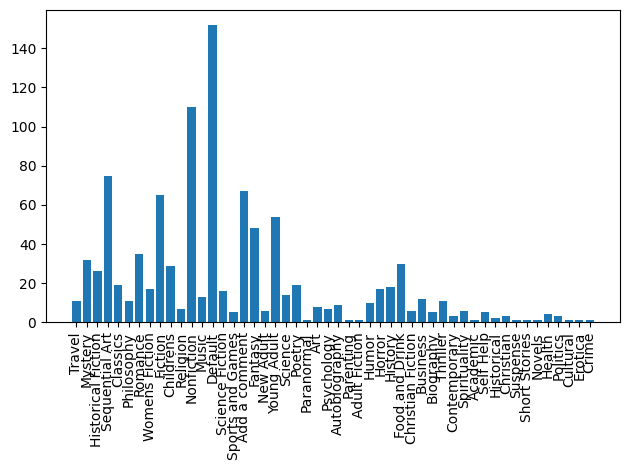

In [8]:
plt.bar(books_per_category.keys(), books_per_category.values())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()